<a href="https://colab.research.google.com/github/CoderJuan21/Project-115/blob/main/Project_115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data = files.upload()

Saving escapevelocity.csv to escapevelocity.csv


In [2]:
import plotly.express as px
import csv
import pandas as pd

df = pd.read_csv("escapevelocity.csv")

velocity = df["Velocity"].tolist()
escaped = df["Escaped"].tolist()

fig = px.scatter(x = velocity, y = escaped)
fig.show()

In [4]:
import numpy as np
velocity_array = np.array(velocity)
escaped_array = np.array(escaped)

m, b = np.polyfit(velocity_array, escaped_array, 1)
y = []
for x in velocity_array:
  y_value = m * x + b
  y.append(y_value)

fig = px.scatter(x = velocity_array, y = escaped_array)
fig.update_layout(shapes = [dict(type = "line", y0 = min(y), y1 = max(y) ,x0 = min(velocity_array), x1 = max(velocity_array))])
fig.show()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



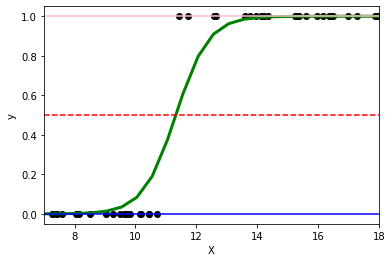

In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X = np.reshape(velocity, (len(velocity), 1))
Y = np.reshape(escaped,(len(escaped), 1))

lr = LogisticRegression()
lr.fit(X , Y)

plt.figure()
plt.scatter(X.ravel(), Y, color = "black")

def model(x):
  return 1/ (1 + np.exp(-x))

X_test = np.linspace(0, 100, 200)
chances = model(X_test * lr.coef_+lr.intercept_).ravel() 

plt.plot(X_test, chances, color = "green", linewidth = 3)
plt.axhline(y = 0, color = "blue", linestyle = "-")
plt.axhline(y = 1, color = "pink", linestyle = "-")
plt.axhline(y = 0.5, color = "red", linestyle = "--")

plt.axvline(x = X_test[165], color = "orange", linestyle = "--")

plt.ylabel("y")
plt.xlabel("X")
plt.xlim(7,18)
plt.show()

In [8]:
velocity_of = float(input("enter your velocity here"))
chances = model(velocity_of * lr.coef_+lr.intercept_).ravel()[0] 
if chances <= 0.01:
  print("the object will not escape")

elif chances >= 1:
  print("the object will probably not escape!!!")

elif chances < 0.5:
  print("the object will probably escape")

else:
  print("the object is likely to escape")

enter your velocity here16
the object is likely to escape
